In [2]:
import numpy as np
import pandas as pd

In [3]:
import os

In [4]:
df=pd.read_csv('iris.csv')

In [5]:
df=df.iloc[:,1:]

In [6]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [7]:
from sklearn.preprocessing import LabelEncoder

In [8]:
lc=LabelEncoder()

In [9]:
df['Species']=lc.fit_transform(df['Species'])

In [10]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [11]:
df=df[df['Species']!= 0][['SepalWidthCm','PetalLengthCm','Species']]

In [12]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

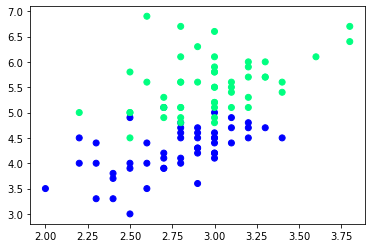

In [14]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [15]:
df=df.sample(100)

In [16]:
df_train=df.iloc[:60,:].sample(10)
df_val=df.iloc[60:80,:].sample(5)
df_test=df.iloc[80:,:].sample(5)

In [17]:
x_test=df_val.iloc[:,:2]
y_test=df_val.iloc[:,-1]

In [18]:
x_test

,SepalWidthCm,PetalLengthCm
107,2.9,6.3
139,3.1,5.4
137,3.1,5.5
114,2.8,5.1
80,2.4,3.8


In [19]:
df_bag=df_train.sample(8,replace=True)
x=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]

In [20]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [21]:
dt_bag1=DecisionTreeClassifier()

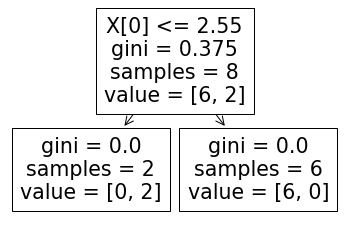

C:\Users\anand\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.0


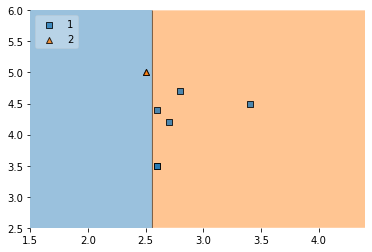

In [29]:
evaluate(dt_bag1,x,y)

In [28]:
def evaluate(clf,x,y):
    clf.fit(x,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(x.values,y.values,clf=clf,legend=2)
    y_pred=clf.predict(x_test)
    print(accuracy_score(y_test,y_pred))

In [51]:
df_bag=df_train.sample(8,replace=True)
x=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt_bag2=DecisionTreeClassifier()

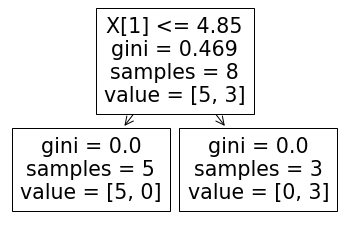

1.0


C:\Users\anand\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


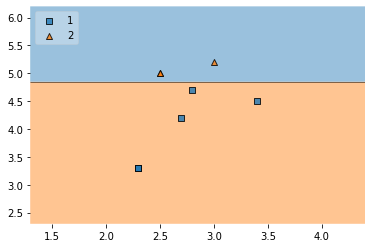

In [56]:
evaluate(dt_bag2,x,y)

In [52]:
df_bag=df_train.sample(8,replace=True)
x=df_bag.iloc[:,0:2]
y=df_bag.iloc[:,-1]
dt_bag3=DecisionTreeClassifier()

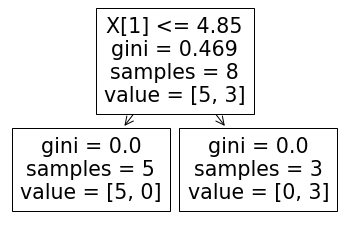

1.0


C:\Users\anand\anaconda3\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


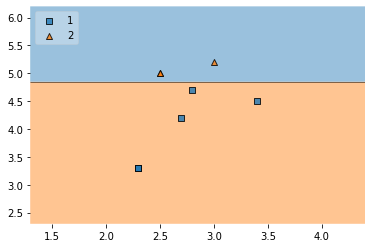

In [57]:
evaluate(dt_bag3,x,y)

In [46]:
sample=pd.DataFrame()

In [54]:
sample['Predictor1']=dt_bag1.predict(x_test)

In [58]:
sample['Predictor2']=dt_bag2.predict(x_test)

In [59]:
sample['Predictor']=dt_bag3.predict(x_test)

,Predictor1,Predictor2,Predictor
0,1,2,2
1,1,2,2
2,1,2,2
3,1,2,2
4,2,1,1


In [61]:
sample['Bagging_out']=sample.mode(axis=1)

In [62]:
sample

,Predictor1,Predictor2,Predictor,Bagging_out
0,1,2,2,2
1,1,2,2,2
2,1,2,2,2
3,1,2,2,2
4,2,1,1,1


In [67]:
sample['Species']=y_test.values

In [68]:
sample

,Predictor1,Predictor2,Predictor,Bagging_out,Species
0,1,2,2,2,2
1,1,2,2,2,2
2,1,2,2,2,2
3,1,2,2,2,2
4,2,1,1,1,1
